#PJM granular locational marginal emission rates

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [ ]:
from google.colab import userdata

In [ ]:
PJM_ENDPOINT = userdata.get("PJM_ENDPOINT")

ROW_COUNT = 50000
START_ROW = 1
DATETIME_BEGINNING_UTC = "2024-03-05 05:00 to 2024-03-12 03:55"

pjm_headers = {
    'Ocp-Apim-Subscription-Key': userdata.get("PJM_API_KEY"),
}

pjm_params = {
    "rowCount": ROW_COUNT,
    "startRow": START_ROW,
    "datetime_beginning_utc": DATETIME_BEGINNING_UTC,
    "pnode_id": userdata.get("PNODE_ID"),
}

response_pjm = requests.get(url=PJM_ENDPOINT, params=pjm_params, headers=pjm_headers)
response_pjm.raise_for_status()
result_pjm = response_pjm.json()["items"]
df_PJM = pd.DataFrame(result_pjm)

df_PJM.drop(["pnode_name", "pnode_id"], axis=1, inplace=True)

In [ ]:
df_PJM.tail()

,datetime_beginning_utc,datetime_beginning_ept,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate
1999,2024-03-05T05:20:00,2024-03-05T00:20:00,798.177770,0.003997,0.029582
2000,2024-03-05T05:15:00,2024-03-05T00:15:00,877.935068,0.004427,0.058282
2001,2024-03-05T05:10:00,2024-03-05T00:10:00,852.254175,0.004304,0.043477
2002,2024-03-05T05:05:00,2024-03-05T00:05:00,765.230220,0.001792,0.040038
2003,2024-03-05T05:00:00,2024-03-05T00:00:00,842.915930,0.004222,0.053419


In [ ]:
df_PJM.head()

,datetime_beginning_utc,datetime_beginning_ept,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate
0,2024-03-12T03:55:00,2024-03-11T23:55:00,814.003863,0.050841,0.054938
1,2024-03-12T03:50:00,2024-03-11T23:50:00,672.100794,0.001466,0.034199
2,2024-03-12T03:45:00,2024-03-11T23:45:00,866.566762,0.004402,0.047405
3,2024-03-12T03:40:00,2024-03-11T23:40:00,768.063632,0.003871,0.036701
4,2024-03-12T03:35:00,2024-03-11T23:35:00,774.126441,0.001574,0.040650


In [ ]:
df_PJM["datetime_beginning_utc"] = pd.to_datetime(df_PJM["datetime_beginning_utc"], utc=True)
df_PJM["datetime_beginning_ept"] = pd.to_datetime(df_PJM["datetime_beginning_ept"])

In [ ]:
df_PJM["date"] = df_PJM.datetime_beginning_ept.dt.date
df_PJM["year"] = df_PJM.datetime_beginning_ept.dt.year
df_PJM["month"] = df_PJM.datetime_beginning_ept.dt.month
df_PJM["day"] = df_PJM.datetime_beginning_ept.dt.day
df_PJM["hour_beginning"] = df_PJM.datetime_beginning_ept.dt.hour
df_PJM["minute"] = df_PJM.datetime_beginning_ept.dt.minute

In [ ]:
df_PJM.head()

,datetime_beginning_utc,datetime_beginning_ept,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate,date,year,month,day,hour_beginning,minute
0,2024-03-12 03:55:00+00:00,2024-03-11 23:55:00,814.003863,0.050841,0.054938,2024-03-11,2024,3,11,23,55
1,2024-03-12 03:50:00+00:00,2024-03-11 23:50:00,672.100794,0.001466,0.034199,2024-03-11,2024,3,11,23,50
2,2024-03-12 03:45:00+00:00,2024-03-11 23:45:00,866.566762,0.004402,0.047405,2024-03-11,2024,3,11,23,45
3,2024-03-12 03:40:00+00:00,2024-03-11 23:40:00,768.063632,0.003871,0.036701,2024-03-11,2024,3,11,23,40
4,2024-03-12 03:35:00+00:00,2024-03-11 23:35:00,774.126441,0.001574,0.040650,2024-03-11,2024,3,11,23,35


In [ ]:
CO2_VALUE = 118
SO2_VALUE = 58800
NOx_VALUE = 93800

In [ ]:
df_PJM_hourly = df_PJM.resample("1H", on="datetime_beginning_utc").mean(numeric_only=True).dropna().reset_index()

df_PJM_hourly["co2_dollar_rate"] = df_PJM_hourly["marginal_co2_rate"] / 2000 * CO2_VALUE
df_PJM_hourly["so2_dollar_rate"] = df_PJM_hourly["marginal_so2_rate"] / 2000 * SO2_VALUE
df_PJM_hourly["nox_dollar_rate"] = df_PJM_hourly["marginal_nox_rate"] / 2000 * NOx_VALUE

df_PJM_hourly["datetime_beginning_ept"] = df_PJM_hourly.datetime_beginning_utc.dt.tz_convert(tz="US/Eastern")

df_PJM_hourly["date"] = df_PJM_hourly.datetime_beginning_ept.dt.date
df_PJM_hourly["year"] = df_PJM_hourly.datetime_beginning_ept.dt.year
df_PJM_hourly["month"] = df_PJM_hourly.datetime_beginning_ept.dt.month
df_PJM_hourly["day"] = df_PJM_hourly.datetime_beginning_ept.dt.day
df_PJM_hourly["hour_beginning"] = df_PJM_hourly.datetime_beginning_ept.dt.hour

In [ ]:
df_PJM_hourly.head()

,datetime_beginning_utc,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate,year,month,day,hour_beginning,minute,co2_dollar_rate,so2_dollar_rate,nox_dollar_rate,datetime_beginning_ept,date
0,2024-03-05 05:00:00+00:00,819.620155,0.003669,0.045700,2024,3,5,0,27.5,48.357589,0.107871,2.143334,2024-03-05 00:00:00-05:00,2024-03-05
1,2024-03-05 06:00:00+00:00,816.797640,0.003936,0.146286,2024,3,5,1,27.5,48.191061,0.115723,6.860829,2024-03-05 01:00:00-05:00,2024-03-05
2,2024-03-05 07:00:00+00:00,832.153180,0.003981,0.076035,2024,3,5,2,27.5,49.097038,0.117027,3.566022,2024-03-05 02:00:00-05:00,2024-03-05
3,2024-03-05 08:00:00+00:00,727.564313,0.003497,0.039030,2024,3,5,3,27.5,42.926294,0.102817,1.830523,2024-03-05 03:00:00-05:00,2024-03-05
4,2024-03-05 09:00:00+00:00,872.971159,0.004286,0.081920,2024,3,5,4,27.5,51.505298,0.125999,3.842048,2024-03-05 04:00:00-05:00,2024-03-05


In [ ]:
df_PJM_hourly.tail()

,datetime_beginning_utc,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate,year,month,day,hour_beginning,minute,co2_dollar_rate,so2_dollar_rate,nox_dollar_rate,datetime_beginning_ept,date
162,2024-03-11 23:00:00+00:00,1459.280908,0.980237,0.541619,2024,3,11,19,27.5,86.097574,28.818978,25.401919,2024-03-11 19:00:00-04:00,2024-03-11
163,2024-03-12 00:00:00+00:00,1235.808750,0.219036,0.371020,2024,3,11,20,27.5,72.912716,6.439644,17.400846,2024-03-11 20:00:00-04:00,2024-03-11
164,2024-03-12 01:00:00+00:00,1466.317780,0.673764,0.547387,2024,3,11,21,27.5,86.512749,19.808647,25.672458,2024-03-11 21:00:00-04:00,2024-03-11
165,2024-03-12 02:00:00+00:00,1146.083806,0.288929,0.273460,2024,3,11,22,27.5,67.618945,8.494513,12.825290,2024-03-11 22:00:00-04:00,2024-03-11
166,2024-03-12 03:00:00+00:00,760.069125,0.011042,0.170676,2024,3,11,23,27.5,44.844078,0.324642,8.004685,2024-03-11 23:00:00-04:00,2024-03-11


In [ ]:
df_avg_hourly = df_PJM_hourly.groupby(["hour_beginning"])[["marginal_co2_rate", "marginal_so2_rate", "marginal_nox_rate"]].mean()
df_avg_hourly.head()

,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate
hour_beginning,,,
0,1063.502972,0.236044,0.226423
1,1055.325886,0.222623,0.231764
2,923.879582,0.081653,0.127264
3,982.729029,0.122957,0.180691
4,963.236109,0.126516,0.140140


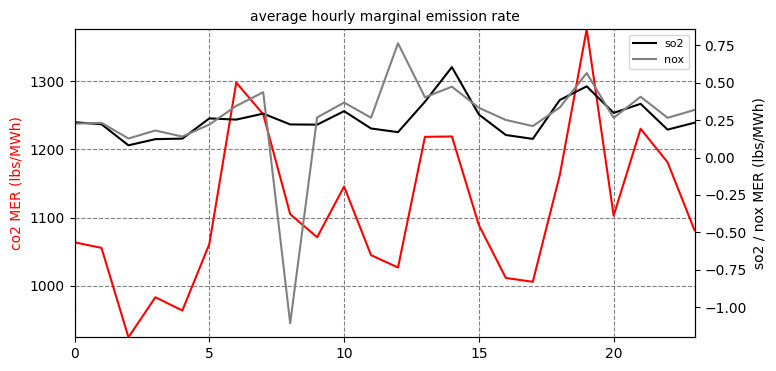

In [ ]:
plt.figure(figsize=(8,4))
plt.title("average hourly marginal emission rate", fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color="grey", linestyle="dashed")
ax1.set_ylabel("co2 MER (lbs/MWh)", color="red", fontsize=10)
ax2.set_ylabel("so2 / nox MER (lbs/MWh)", fontsize=10)

ax1.set_xlim([df_avg_hourly.index.min(), df_avg_hourly.index.max()])
ax1.set_ylim([df_avg_hourly.marginal_co2_rate.min(), df_avg_hourly.marginal_co2_rate.max()])

ax1.plot(df_avg_hourly.index, df_avg_hourly.marginal_co2_rate, label="co2", color="red")
ax2.plot(df_avg_hourly.index, df_avg_hourly.marginal_so2_rate, label="so2", color="black")
ax2.plot(df_avg_hourly.index, df_avg_hourly.marginal_nox_rate, label="nox", color="grey")

plt.legend(fontsize=8)
plt.show()

In [ ]:
select_day = 5

df_selectday = df_PJM_hourly[df_PJM_hourly.day==select_day].set_index("datetime_beginning_ept")
df_selectday.head()

,datetime_beginning_utc,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate,year,month,day,hour_beginning,minute,co2_dollar_rate,so2_dollar_rate,nox_dollar_rate,date
datetime_beginning_ept,,,,,,,,,,,,,
2024-03-05 00:00:00-05:00,2024-03-05 05:00:00+00:00,819.620155,0.003669,0.045700,2024,3,5,0,27.5,48.357589,0.107871,2.143334,2024-03-05
2024-03-05 01:00:00-05:00,2024-03-05 06:00:00+00:00,816.797640,0.003936,0.146286,2024,3,5,1,27.5,48.191061,0.115723,6.860829,2024-03-05
2024-03-05 02:00:00-05:00,2024-03-05 07:00:00+00:00,832.153180,0.003981,0.076035,2024,3,5,2,27.5,49.097038,0.117027,3.566022,2024-03-05
2024-03-05 03:00:00-05:00,2024-03-05 08:00:00+00:00,727.564313,0.003497,0.039030,2024,3,5,3,27.5,42.926294,0.102817,1.830523,2024-03-05
2024-03-05 04:00:00-05:00,2024-03-05 09:00:00+00:00,872.971159,0.004286,0.081920,2024,3,5,4,27.5,51.505298,0.125999,3.842048,2024-03-05


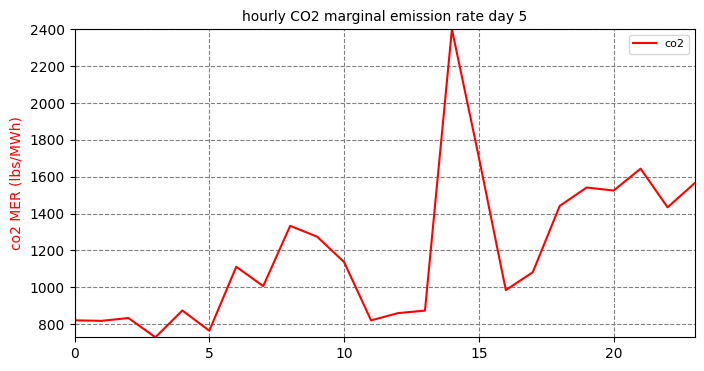

In [ ]:
plt.figure(figsize=(8,4))
plt.title(f"hourly CO2 marginal emission rate day {select_day}", fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax1 = plt.gca()

ax1.grid(color="grey", linestyle="dashed")
ax1.set_ylabel("co2 MER (lbs/MWh)", color="red", fontsize=10)

ax1.set_xlim([df_selectday.hour_beginning.min(), df_selectday.hour_beginning.max()])
ax1.set_ylim([df_selectday.marginal_co2_rate.min(), df_selectday.marginal_co2_rate.max()])

ax1.plot(df_selectday.hour_beginning, df_selectday.marginal_co2_rate, label="co2", color="red")

plt.legend(fontsize=8)
plt.show()

In [ ]:
df_selectday_fivemin = df_PJM[df_PJM.day==select_day].set_index("datetime_beginning_ept")
df_selectday_fivemin.head()

,datetime_beginning_utc,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate,date,year,month,day,hour_beginning,minute
datetime_beginning_ept,,,,,,,,,,
2024-03-05 23:55:00,2024-03-06 04:55:00+00:00,2475.457477,1.418086,1.279851,2024-03-05,2024,3,5,23,55
2024-03-05 23:50:00,2024-03-06 04:50:00+00:00,2194.585849,2.692096,0.898991,2024-03-05,2024,3,5,23,50
2024-03-05 23:45:00,2024-03-06 04:45:00+00:00,790.101996,0.003955,0.040937,2024-03-05,2024,3,5,23,45
2024-03-05 23:40:00,2024-03-06 04:40:00+00:00,822.765227,0.004235,0.049521,2024-03-05,2024,3,5,23,40
2024-03-05 23:35:00,2024-03-06 04:35:00+00:00,869.031850,0.004366,0.064888,2024-03-05,2024,3,5,23,35


In [ ]:
hours = mdates.HourLocator()
hours_fmt = mdates.DateFormatter("%H:%M")

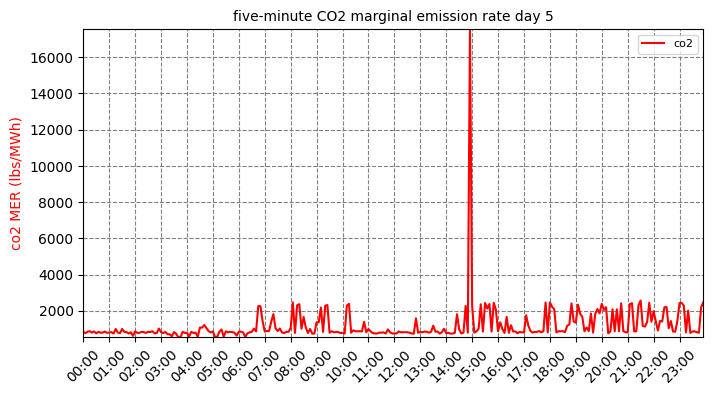

In [ ]:
plt.figure(figsize=(8,4))
plt.title(f"five-minute CO2 marginal emission rate day {select_day}", fontsize=10)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

ax1 = plt.gca()

ax1.grid(color="grey", linestyle="dashed")
ax1.set_ylabel("co2 MER (lbs/MWh)", color="red", fontsize=10)

ax1.xaxis.set_major_locator(hours)
ax1.xaxis.set_major_formatter(hours_fmt)

ax1.set_xlim([df_selectday_fivemin.index.min(), df_selectday_fivemin.index.max()])
ax1.set_ylim([df_selectday_fivemin.marginal_co2_rate.min(), df_selectday_fivemin.marginal_co2_rate.max()])

ax1.plot(df_selectday_fivemin.index, df_selectday_fivemin.marginal_co2_rate, label="co2", color="red")

plt.legend(fontsize=8)
plt.show()

In [ ]:
select_hours = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

df_selectday_hours_fivemin = df_selectday_fivemin[df_selectday_fivemin.hour_beginning.isin(select_hours)]
df_selectday_hours_fivemin.head()

,datetime_beginning_utc,marginal_co2_rate,marginal_so2_rate,marginal_nox_rate,date,year,month,day,hour_beginning,minute
datetime_beginning_ept,,,,,,,,,,
2024-03-05 20:55:00,2024-03-06 01:55:00+00:00,823.522111,0.004198,0.043870,2024-03-05,2024,3,5,20,55
2024-03-05 20:50:00,2024-03-06 01:50:00+00:00,877.449821,0.004980,0.052677,2024-03-05,2024,3,5,20,50
2024-03-05 20:45:00,2024-03-06 01:45:00+00:00,2417.643800,3.470700,1.115887,2024-03-05,2024,3,5,20,45
2024-03-05 20:40:00,2024-03-06 01:40:00+00:00,872.902289,0.004954,0.052416,2024-03-05,2024,3,5,20,40
2024-03-05 20:35:00,2024-03-06 01:35:00+00:00,2084.361140,2.593803,0.723393,2024-03-05,2024,3,5,20,35


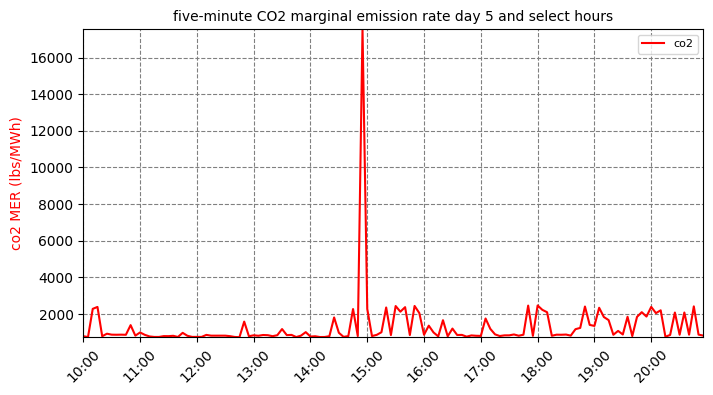

In [ ]:
plt.figure(figsize=(8,4))
plt.title(f"five-minute CO2 marginal emission rate day {select_day} and select hours", fontsize=10)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

ax1 = plt.gca()

ax1.grid(color="grey", linestyle="dashed")
ax1.set_ylabel("co2 MER (lbs/MWh)", color="red", fontsize=10)

ax1.xaxis.set_major_locator(hours)
ax1.xaxis.set_major_formatter(hours_fmt)

ax1.set_xlim([df_selectday_hours_fivemin.index.min(), df_selectday_hours_fivemin.index.max()])
ax1.set_ylim([df_selectday_hours_fivemin.marginal_co2_rate.min(), df_selectday_hours_fivemin.marginal_co2_rate.max()])

ax1.plot(df_selectday_hours_fivemin.index, df_selectday_hours_fivemin.marginal_co2_rate, label="co2", color="red")

plt.legend(fontsize=8)
plt.show()

In [ ]:
df_PJM.to_csv("df_PJM.csv")
df_PJM_hourly.to_csv("df_PJM_hourly.csv")